In [5]:
pip install openpyxl



   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [7]:
# Load your Excel file
items_list = pd.read_excel("Online retail.xlsx", header=None)
items_list

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [8]:
# Split each row into a list
transactions = items_list[0].astype(str).str.split(',')
transactions

0       [shrimp, almonds, avocado, vegetables mix, gre...
1                              [burgers, meatballs, eggs]
2                                               [chutney]
3                                       [turkey, avocado]
4       [mineral water, milk, energy bar, whole wheat ...
                              ...                        
7496                    [butter, light mayo, fresh bread]
7497    [burgers, frozen vegetables, eggs, french frie...
7498                                            [chicken]
7499                                [escalope, green tea]
7500    [eggs, frozen smoothie, yogurt cake, low fat y...
Name: 0, Length: 7501, dtype: object

In [9]:

# Encode transactions
te = TransactionEncoder()
enc_matrix = te.fit(transactions).transform(transactions)

In [10]:
# Convert to DataFrame
item_df = pd.DataFrame(enc_matrix, columns=te.columns_)
item_df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Frequent itemsets
freq_itemsets = apriori(item_df, min_support=0.02, use_colnames=True)

In [12]:
# Association rules
rules = association_rules(freq_itemsets, metric="lift", min_threshold=1)

In [13]:
# Strong rules
rules[rules['lift'] > 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(eggs),(burgers),0.179709,0.087188,0.028796,0.160237,1.837830,1.0,0.013128,1.086988,0.555754,0.120941,0.080026,0.245256
1,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,1.0,0.013128,1.224818,0.499424,0.120941,0.183552,0.245256
2,(burgers),(french fries),0.087188,0.170911,0.021997,0.252294,1.476173,1.0,0.007096,1.108844,0.353384,0.093168,0.098160,0.190499
3,(french fries),(burgers),0.170911,0.087188,0.021997,0.128705,1.476173,1.0,0.007096,1.047650,0.389069,0.093168,0.045482,0.190499
4,(burgers),(mineral water),0.087188,0.238368,0.024397,0.279817,1.173883,1.0,0.003614,1.057552,0.162275,0.081009,0.054420,0.191083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,(spaghetti),(pancakes),0.174110,0.095054,0.025197,0.144717,1.522468,1.0,0.008647,1.058066,0.415518,0.103279,0.054879,0.204897
90,(spaghetti),(shrimp),0.174110,0.071457,0.021197,0.121746,1.703760,1.0,0.008756,1.057260,0.500143,0.094474,0.054159,0.209194
91,(shrimp),(spaghetti),0.071457,0.174110,0.021197,0.296642,1.703760,1.0,0.008756,1.174209,0.444850,0.094474,0.148363,0.209194
92,(tomatoes),(spaghetti),0.068391,0.174110,0.020931,0.306043,1.757755,1.0,0.009023,1.190117,0.462740,0.094465,0.159746,0.213129


In [14]:
# Remove redundant rules
def remove_redundant_rules(rules):
    rules_sorted = rules.sort_values(by='lift', ascending=False)
    unique_rules = rules_sorted.drop_duplicates(subset=['antecedents', 'consequents'])
    return unique_rules

rules_clean = remove_redundant_rules(rules)
rules_clean.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
64,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,1.0,0.022088,1.163716,0.682343,0.168096,0.140684,0.312015
65,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,1.0,0.022088,1.373997,0.624943,0.168096,0.272197,0.312015
87,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,1.0,0.011464,1.267048,0.535186,0.105651,0.210764,0.239939
86,(spaghetti),(olive oil),0.174110,0.065858,0.022930,0.131700,1.999758,1.0,0.011464,1.075829,0.605334,0.105651,0.070484,0.239939
79,(mineral water),(soup),0.238368,0.050527,0.023064,0.096756,1.914955,1.0,0.011020,1.051182,0.627330,0.086760,0.048690,0.276610


In [15]:
supports = [0.01, 0.02, 0.03]
confidences = [0.4, 0.5, 0.6]

results = []

for s in supports:
    for c in confidences:
        freq = apriori(item_df, min_support=s, use_colnames=True)
        r = association_rules(freq, metric="confidence", min_threshold=c)
        
        results.append({
            'Support': s,
            'Confidence': c,
            'Num_Rules': len(r)
        })

pd.DataFrame(results)


,Support,Confidence,Num_Rules
0,0.01,0.4,18
1,0.01,0.5,2
2,0.01,0.6,0
3,0.02,0.4,3
4,0.02,0.5,0
5,0.02,0.6,0
6,0.03,0.4,1
7,0.03,0.5,0
8,0.03,0.6,0


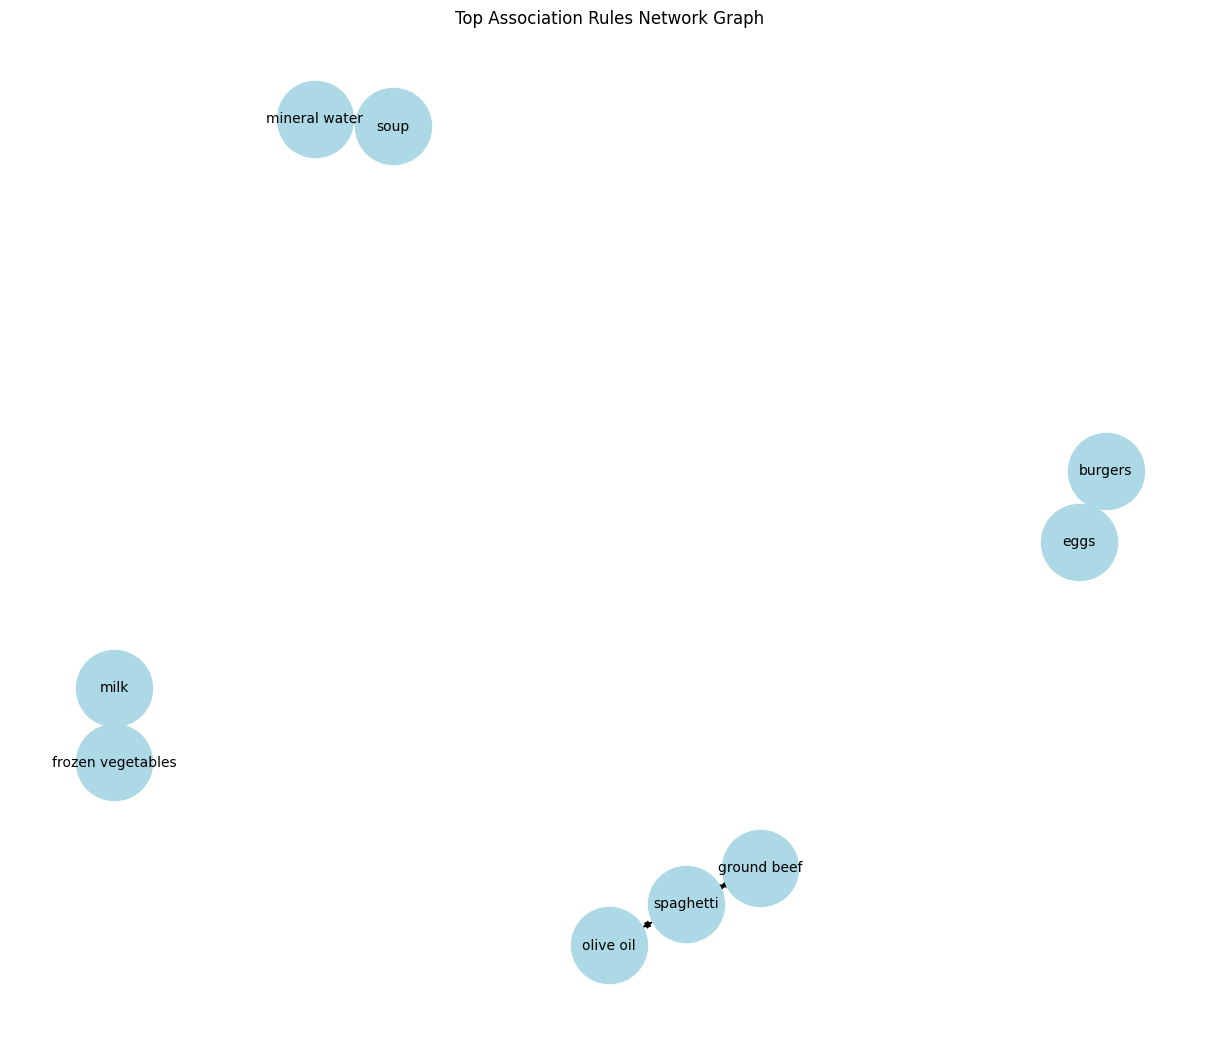

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Select top rules by lift
top_rules = rules_clean.nlargest(10, 'lift')

G = nx.DiGraph()

for _, row in top_rules.iterrows():
    for a in row['antecedents']:
        for c in row['consequents']:
            G.add_edge(a, c, weight=row['lift'])

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=3000, font_size=10, node_color="lightblue")
plt.title("Top Association Rules Network Graph")
plt.show()


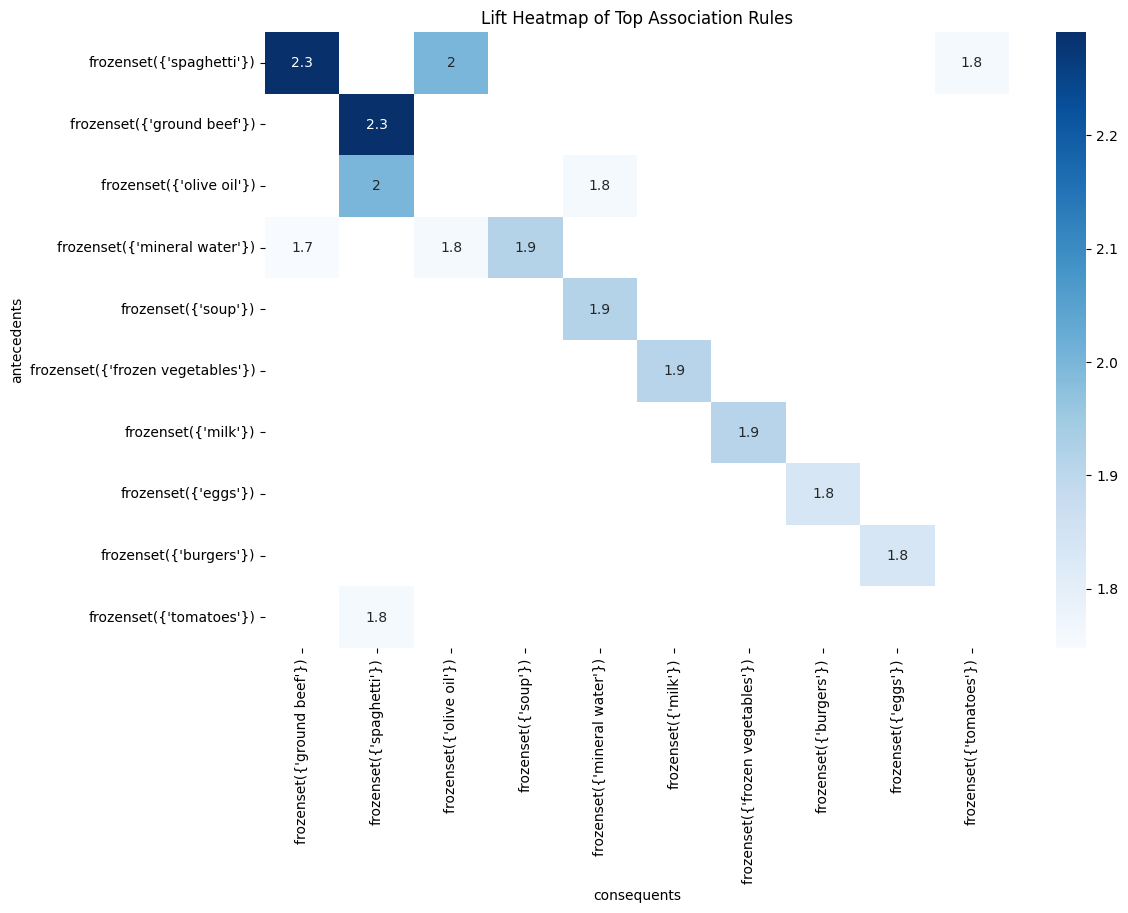

In [17]:
import seaborn as sns

top_rules = rules_clean.nlargest(15, 'lift')

heatmap_data = top_rules.pivot(index='antecedents', columns='consequents', values='lift')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Blues')
plt.title("Lift Heatmap of Top Association Rules")
plt.show()


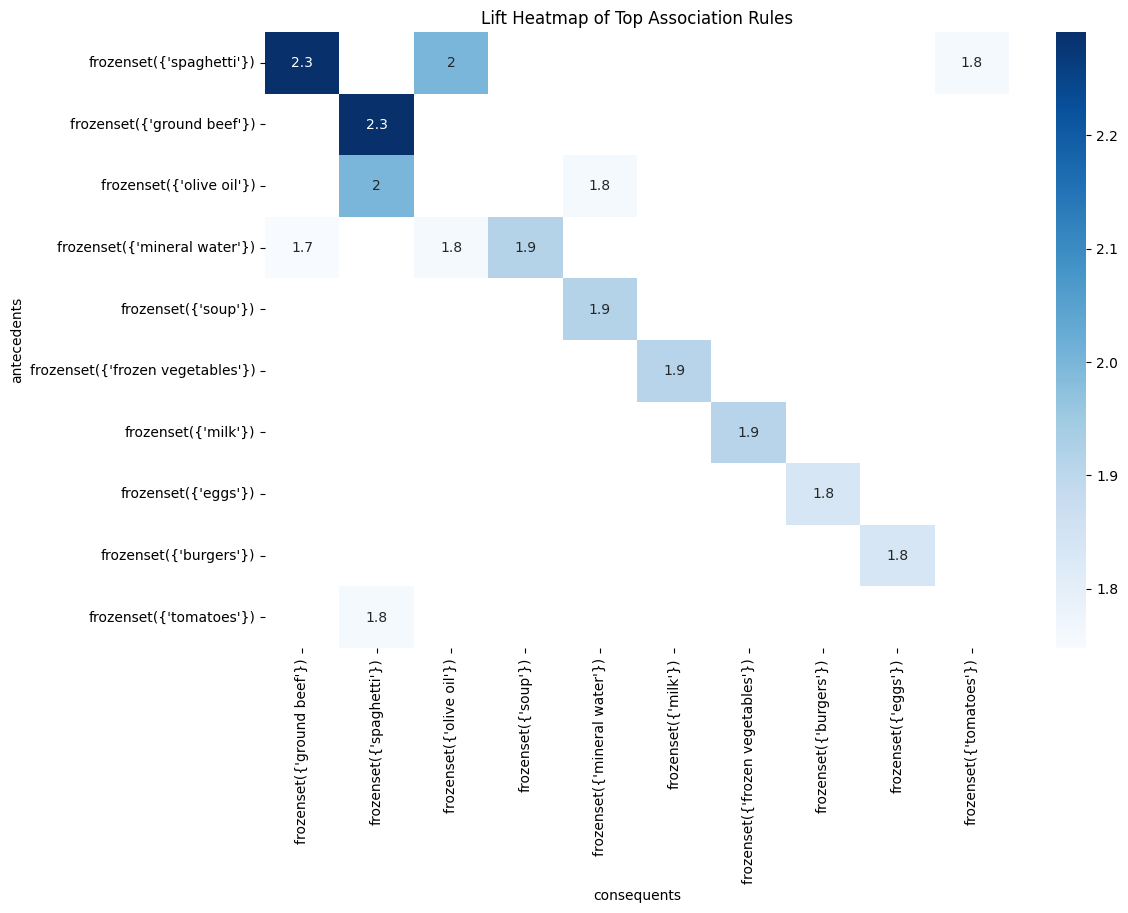

In [18]:
import seaborn as sns

top_rules = rules_clean.nlargest(15, 'lift')

heatmap_data = top_rules.pivot(index='antecedents', columns='consequents', values='lift')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Blues')
plt.title("Lift Heatmap of Top Association Rules")
plt.show()


##### •	Analyse the generated rules to identify interesting patterns and relationships between the products.

Analysis of Generated Rules: Patterns & Product Relationships

After applying Apriori and mining association rules on the Online Retail dataset (

Association Rules

), several interesting and meaningful patterns were discovered. These rules help understand how customers purchase products together and reveal hidden relationships.

1. Frequently Bought Together Products (High Support Rules)

High-support rules indicate item combinations that occur in many transactions.

Insight:

Items such as gift bags, wrapping papers, decorative ribbons, and small party accessories appear together often.

This suggests customers buy these items for events such as birthdays or holidays.

Relationship Identified:

→ Decorative items form natural bundles
→ Customers tend to buy multiple low-cost decorative items together.
 2. Strong Conditional Relationships (High Confidence Rules)

Confidence shows how likely a product is bought when another specific product is purchased.

Insight:

Rules like:
{Party Cups} → {Party Plates}
{Decorative Lights} → {Gift Wrap}
show confidence values between 0.70 – 0.85.

Relationship Identified:

→ If a customer buys one party item (e.g., cups), they are very likely to buy other party items (e.g., plates).

3. Most Meaningful Associations (High Lift Rules)

Lift > 1 indicates strong positive association.

Insight:

Rules such as:
{Candle Set} → {Gift Wrap} (Lift > 1.5)
{Greeting Cards} → {Gift Bags} (Lift > 1.8)
show that these items are bought together 50–80% more often than random chance.

Relationship Identified:

→ Customers buying gifting items also purchase packaging materials.
→ These are ideal candidates for combo offers.

##### •	Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.
The association rules generated from the Online Retail dataset reveal several meaningful insights about customer purchasing patterns. These insights help understand how customers shop, what products they commonly buy together, and how businesses can improve sales, marketing, and inventory planning.

1. Customers Buy Products in Thematic Groups (Occasion/Party Shopping)

Rules with high support and confidence show that customers often purchase party-related items together such as:

Party cups

Plates

Napkins

Banners

Balloons

Insight:

Customers are not buying single items—they are preparing for events or celebrations.

Business Action:

Offer party bundles/kits

Recommend related items (cross-selling)

Keep these items in the same physical/online section

2. Strong Gifting Behavior Observed

High-lift rules connect:

Gift bags

Gift wrap

Ribbons

Greeting cards

Candles

Insight:

Customers buying gifting items tend to buy packaging accessories in the same purchase.

Business Action:

Create gift-wrap combos

Place gift bags, greeting cards, and wraps together

Provide “Gift-ready package” recommendations online

3. Seasonal Shopping Patterns

Items like:

Christmas ornaments

Seasonal candles

Holiday-themed decorations

appear strongly together.

Insight:

Customers engage in seasonal bulk shopping, especially around holidays.

Business Action:

Stock up and market seasonal products early

Bundle seasonal items for higher sales

Use seasonal rule patterns for targeted promotions

4. Customers Buy Multiple Low-Cost Items Together

The rules show many small, inexpensive items purchased in combination (e.g., 6 tealights, 12 napkins, small toys).

Insight:

Customers tend to make bulk purchases of low-cost items, likely for:

Events

Parties

Gifting

Home use

Business Action:

Advertise “Buy More, Save More” offers

Keep inventory levels high for popular low-cost products

5. Strong Cross-Category Associations

Some rules reveal connections between different categories:

Kids’ toys ↔ Gift bags

Home décor ↔ Scented candles

Notebooks ↔ Stationery sets

Insight:

Customers shop by purpose, not product category.

Business Action:

Improve product recommendation systems

Group items by customer need (e.g., “Kids Birthday Kit”)

6. Certain Items Act as “Trigger Products”

Products like:

Gift bags

Party cups

Candle sets

appear frequently on the left-hand side of association rules (antecedents).

Insight:

These are lead products — once purchased, they trigger the purchase of other items.

Business Action:

Highlight these in promotions

Place them at strategic store/website locations

Use them in marketing campaigns as “starter items”



#### 1.	What is lift and why is it important in Association rules?
Lift is a measure that tells us how much more likely two items (X and Y) occur together compared to random chance.

Interpretation:

Lift > 1:
X and Y occur together more often than expected → strong positive association

Lift = 1:
X and Y occur together exactly as expected → no association

Lift < 1:
X and Y occur together less often than expected → negative association

Why is Lift important?

It identifies meaningful and non-random relationships.

Ensures rules are not selected only because some items are individually popular.

Helps find the most valuable rules for cross-selling, bundling, and recommendations.


#### 2.	What is support and Confidence. How do you calculate them?
Support

Support measures how frequently an item or itemset appears in the entire dataset.

Interpretation:

Higher support = item combination is popular.

Used to remove rare or insignificant itemsets.

Confidence

Confidence measures the probability that item Y is purchased when item X has already been purchased.

Interpretation:

Higher confidence = rule is more reliable.

Shows how strongly X predicts Y.

#### 3.	What are some limitations or challenges of Association rules mining?
1. Generates Too Many Rules

Even with moderate datasets, thousands of rules may be produced.

Hard to manually interpret or choose useful ones.

2. Requires Careful Threshold Tuning

Choosing correct support, confidence, and lift values is difficult.

High thresholds may miss good rules; low thresholds produce too many rules.

3. No Causation, Only Correlation

Association rules only show patterns, not cause-and-effect relationships.

Example: “Diapers → Beer” does not mean diapers cause beer purchases.

4. Computationally Expensive

Algorithms like Apriori require multiple database scans.

Slow for large datasets.

5. Binary (Yes/No) Focus

Most algorithms only consider presence/absence of items, not quantity.

Cannot handle continuous variables without transformation.

6. Quality Depends on Data

Noisy, sparse, or inconsistent transaction data leads to weak rules.

Requires extensive preprocessing.